<h3> 1.) What was the change in price of the stock over time? </h3>
<h3> 2.) What was the daily return of the stock on average?
<h3> 3.) What was the moving average of the various stocks? 
<h3> 4.) What was the correlation between different stocks'?
<h3> 5.) How much value do we put at risk by investing in a particular stock?
<h3> 6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
import yfinance as yf

from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr

In [5]:
yf.pdr_override()

from datetime import datetime

In [6]:
end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)


In [7]:
data = yf.download('SBIN.NS',start,end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data.to_csv('SBI.csv')

In [8]:
df = pd.read_csv('SBI.csv')

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-11,460.000000,474.950012,458.649994,469.250000,453.231934,20686981
1,2021-10-12,470.000000,484.399994,468.100006,483.000000,466.512543,33763609
2,2021-10-13,486.149994,486.149994,478.000000,481.700012,465.256958,17638983
3,2021-10-14,482.000000,493.899994,482.000000,490.600006,473.853119,23431826
4,2021-10-18,494.000000,501.000000,491.700012,497.950012,480.952209,20084248


In [10]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
490,2023-10-03,596.599976,604.900024,589.599976,602.950012,602.950012,15322196
491,2023-10-04,600.000000,600.450012,584.450012,586.250000,586.250000,24914612
492,2023-10-05,590.000000,594.349976,587.099976,592.150024,592.150024,13248028
493,2023-10-06,593.400024,598.950012,592.200012,594.250000,594.250000,8216780
494,2023-10-09,588.000000,589.000000,581.549988,585.099976,585.099976,9189597


In [11]:
df1 = df.reset_index()['Close']

In [12]:
df1

0      469.250000
1      483.000000
2      481.700012
3      490.600006
4      497.950012
          ...    
490    602.950012
491    586.250000
492    592.150024
493    594.250000
494    585.099976
Name: Close, Length: 495, dtype: float64

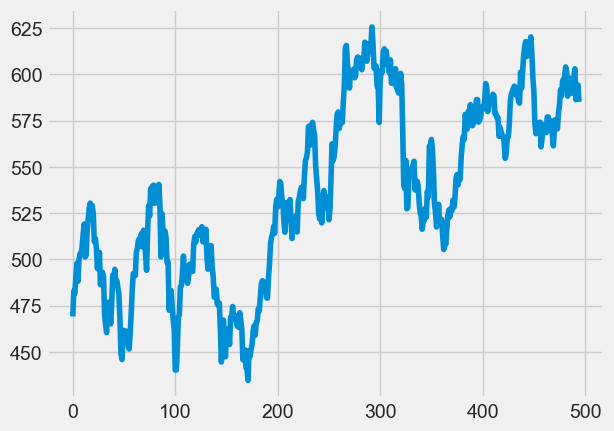

In [13]:
plt.plot(df1)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
df1

array([[0.18107961],
       [0.25314461],
       [0.24633125],
       [0.29297693],
       [0.33149897],
       [0.28039834],
       [0.341719  ],
       [0.35770443],
       [0.35770443],
       [0.37631023],
       [0.40801877],
       [0.44261016],
       [0.34931865],
       [0.35351146],
       [0.42452833],
       [0.45597487],
       [0.48715942],
       [0.50183441],
       [0.4640985 ],
       [0.49502106],
       [0.47012588],
       [0.39255765],
       [0.40172955],
       [0.37657222],
       [0.31656183],
       [0.3325471 ],
       [0.36215922],
       [0.27096428],
       [0.3058175 ],
       [0.30634164],
       [0.29271478],
       [0.18763098],
       [0.15932912],
       [0.13548206],
       [0.21278815],
       [0.22169806],
       [0.20151983],
       [0.16037724],
       [0.2201258 ],
       [0.29795587],
       [0.28275674],
       [0.31446543],
       [0.27830178],
       [0.28223259],
       [0.26257851],
       [0.24344856],
       [0.17347997],
       [0.075

In [16]:
#splitting dataset into train and test split
train_size = int(len(df1)*0.70)
test_size = len(df1)-train_size
train_data,test_data = df1[0:train_size,:],df1[train_size:len(df1),:1]



In [17]:
train_size,test_size

(346, 149)

In [18]:
train_data

array([[0.18107961],
       [0.25314461],
       [0.24633125],
       [0.29297693],
       [0.33149897],
       [0.28039834],
       [0.341719  ],
       [0.35770443],
       [0.35770443],
       [0.37631023],
       [0.40801877],
       [0.44261016],
       [0.34931865],
       [0.35351146],
       [0.42452833],
       [0.45597487],
       [0.48715942],
       [0.50183441],
       [0.4640985 ],
       [0.49502106],
       [0.47012588],
       [0.39255765],
       [0.40172955],
       [0.37657222],
       [0.31656183],
       [0.3325471 ],
       [0.36215922],
       [0.27096428],
       [0.3058175 ],
       [0.30634164],
       [0.29271478],
       [0.18763098],
       [0.15932912],
       [0.13548206],
       [0.21278815],
       [0.22169806],
       [0.20151983],
       [0.16037724],
       [0.2201258 ],
       [0.29795587],
       [0.28275674],
       [0.31446543],
       [0.27830178],
       [0.28223259],
       [0.26257851],
       [0.24344856],
       [0.17347997],
       [0.075

In [19]:
import numpy as np

In [20]:
def create_dataset(dataset, time_step=1):
    dataX , dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)
        

In [21]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
X_train.shape

(245, 100)

In [23]:
y_train.shape

(245,)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [2]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata (4.8 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26

In [3]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
4/4 [==============================] - 8s 627ms/step - loss: 0.2176 - val_loss: 0.1231
Epoch 2/100
4/4 [==============================] - 1s 189ms/step - loss: 0.0408 - val_loss: 0.0494
Epoch 3/100
4/4 [==============================] - 1s 166ms/step - loss: 0.0467 - val_loss: 0.0166
Epoch 4/100
4/4 [==============================] - 1s 156ms/step - loss: 0.0305 - val_loss: 0.0569
Epoch 5/100
4/4 [==============================] - 1s 193ms/step - loss: 0.0331 - val_loss: 0.0237
Epoch 6/100
4/4 [==============================] - 1s 154ms/step - loss: 0.0208 - val_loss: 0.0078
Epoch 7/100
4/4 [==============================] - 1s 152ms/step - loss: 0.0233 - val_loss: 0.0077
Epoch 8/100
4/4 [==============================] - 1s 183ms/step - loss: 0.0184 - val_loss: 0.0117
Epoch 9/100
4/4 [==============================] - 1s 161ms/step - loss: 0.0180 - val_loss: 0.0151
Epoch 10/100
4/4 [==============================] - 1s 150ms/step - loss: 0.0171 - val_loss: 0.0076
Epoch 11/

4/4 [==============================] - 1s 201ms/step - loss: 0.0048 - val_loss: 0.0031
Epoch 84/100
4/4 [==============================] - 1s 200ms/step - loss: 0.0046 - val_loss: 0.0031
Epoch 85/100
4/4 [==============================] - 1s 179ms/step - loss: 0.0046 - val_loss: 0.0034
Epoch 86/100
4/4 [==============================] - 1s 175ms/step - loss: 0.0045 - val_loss: 0.0028
Epoch 87/100
4/4 [==============================] - 1s 204ms/step - loss: 0.0046 - val_loss: 0.0025
Epoch 88/100
4/4 [==============================] - 1s 187ms/step - loss: 0.0043 - val_loss: 0.0023
Epoch 89/100
4/4 [==============================] - 1s 171ms/step - loss: 0.0042 - val_loss: 0.0025
Epoch 90/100
4/4 [==============================] - 1s 204ms/step - loss: 0.0041 - val_loss: 0.0023
Epoch 91/100
4/4 [==============================] - 1s 181ms/step - loss: 0.0041 - val_loss: 0.0022
Epoch 92/100
4/4 [==============================] - 1s 178ms/step - loss: 0.0039 - val_loss: 0.0023
Epoch 93/100


In [28]:
import tensorflow as tf

In [29]:
tf.__version__

'2.14.0'

In [30]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

2/2 [==============================] - 0s 40ms/step


In [31]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

531.1894649638356

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

580.0123516715225

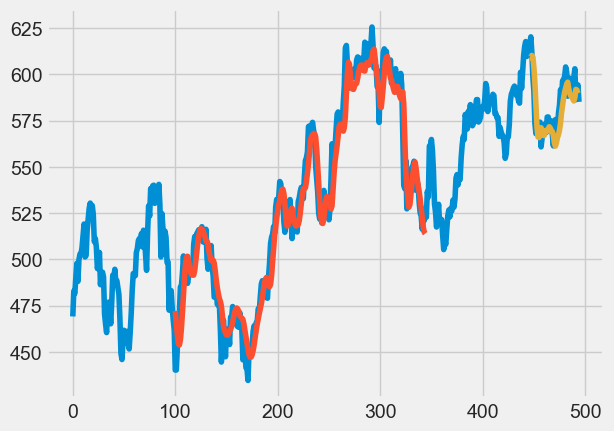

In [38]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()